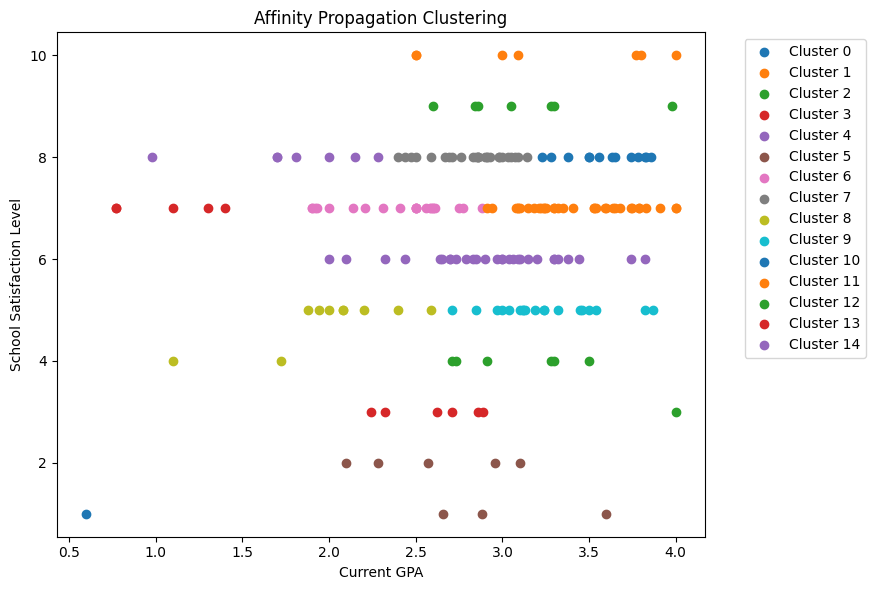

Silhouette Score:  0.5646664978011406


In [16]:
import pandas as pd
from numpy import unique, where
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

# Read the Excel file
df = pd.read_excel('Cleansed.xlsx')


# Select the two specific columns you want to use for clustering
# Replace 'column1' and 'column2' with the actual column names
selected_columns = ['Current GPA', 'School Satisfaction Level']
df_selected = df[selected_columns]


# Preprocess the data: Convert categorical columns to numeric if necessary
label_encoders = {}
for column in df_selected.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le

# Convert the DataFrame to a NumPy array
X = df_selected.to_numpy()

# Define the model
model = AffinityPropagation(damping=0.7)

# Fit the model
model.fit(X)

# Assign a cluster to each example
yhat = model.predict(X)

# Retrieve unique clusters
clusters = unique(yhat)

plt.figure(figsize=(12, 6))

# Create scatter plot for samples from each cluster
for cluster in clusters:
    # Get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # Create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f'Cluster {cluster}')

# Show the plot
plt.xlabel('Current GPA')
plt.ylabel('School Satisfaction Level')
plt.title('Affinity Propagation Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

sil_score = silhouette_score(X, yhat)
print("Silhouette Score: ", sil_score)